In [2]:
#hide
! pip install -Uqq fastbook
! pip install -Uqq pylance
from fastbook import *
import ipywidgets as widgets

In [3]:
path = Path()/'Tire Textures'
path.ls()

(#2) [Path('Tire Textures/training_data'),Path('Tire Textures/testing_data')]

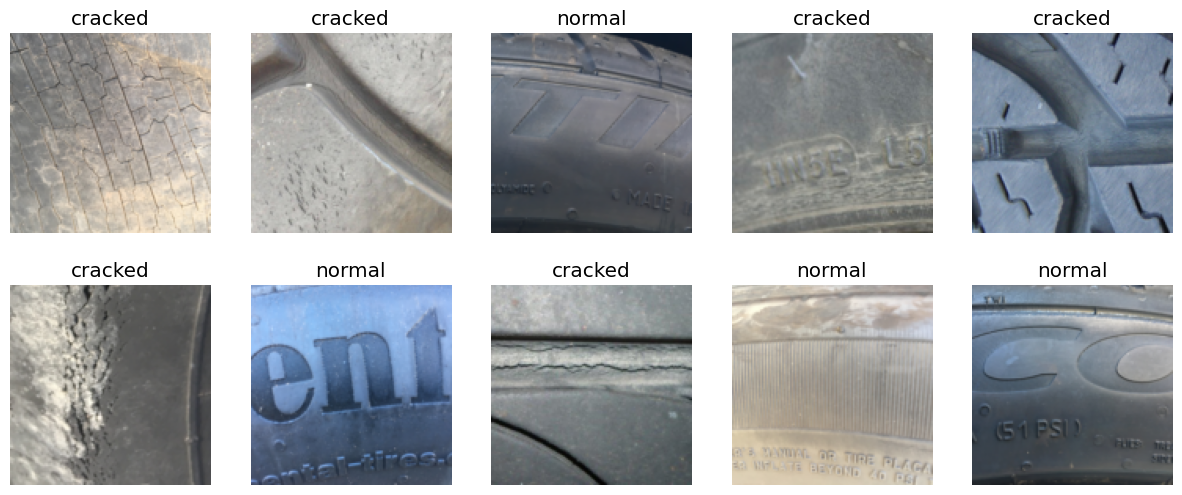

In [4]:
tires = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(128))

tiresDataLoads = tires.dataloaders(path)
tiresDataLoads.valid.show_batch(max_n=10, nrows=2)

# Lets Test different image transmutations

## This is Pad. Essentially add black/white bars. All this data already seems transformed

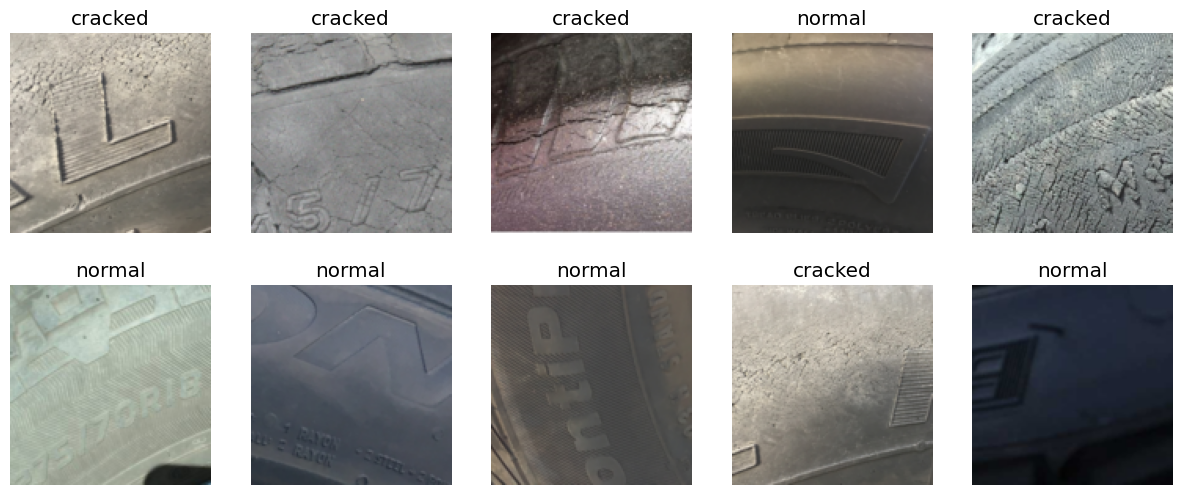

In [5]:
tires = tires.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
tiresDataLoads = tires.dataloaders(path)
tiresDataLoads.valid.show_batch(max_n=10, nrows=2)


# This is my favorite item trasformation method

## Random Resized Crop


It selectes different centers for the image and then scales a random amount (essentially zooms in on that center) so as to select a different portion of the picture

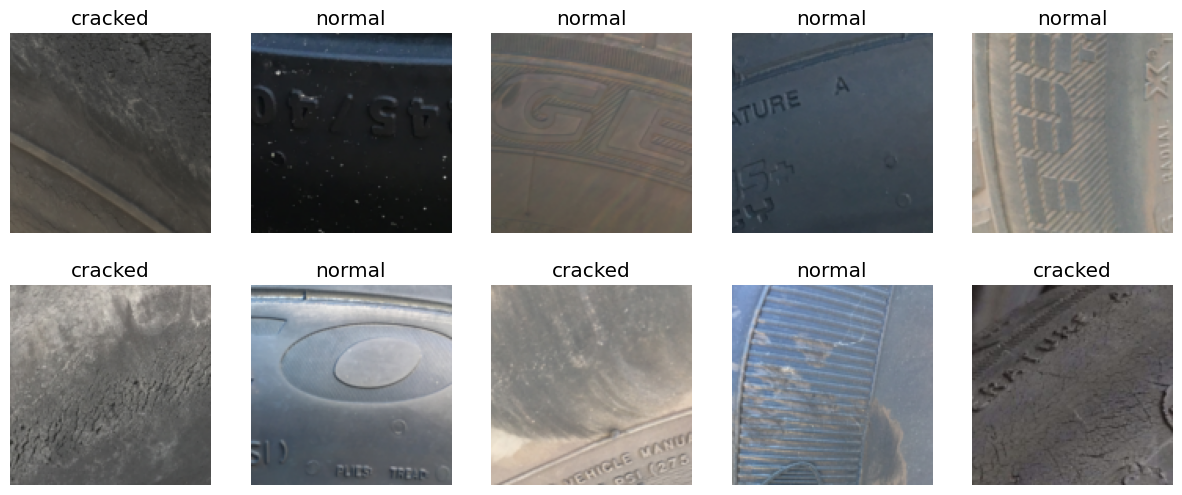

In [6]:
tires = tires.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
tiresDataLoads = tires.dataloaders(path)
tiresDataLoads.valid.show_batch(max_n=10, nrows=2)


In [7]:
learn = cnn_learner(tiresDataLoads, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/yekososa/mambaforge/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/yekososa/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yekososa/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.841565,0.513872,0.190244,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.515695,0.348710,0.126829,00:06
1,0.409380,0.347494,0.102439,00:06
2,0.347992,0.365121,0.112195,00:06


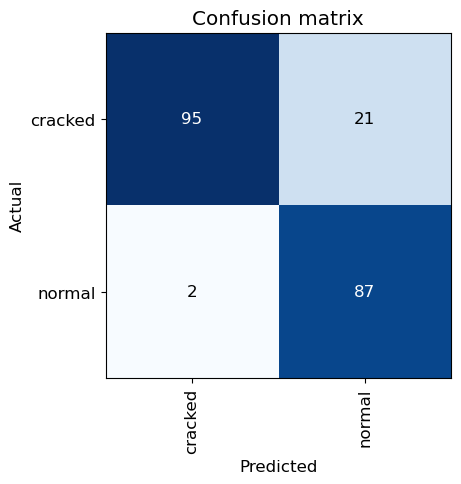

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# lets figure this out by cleaning the data with the highest recorded loss

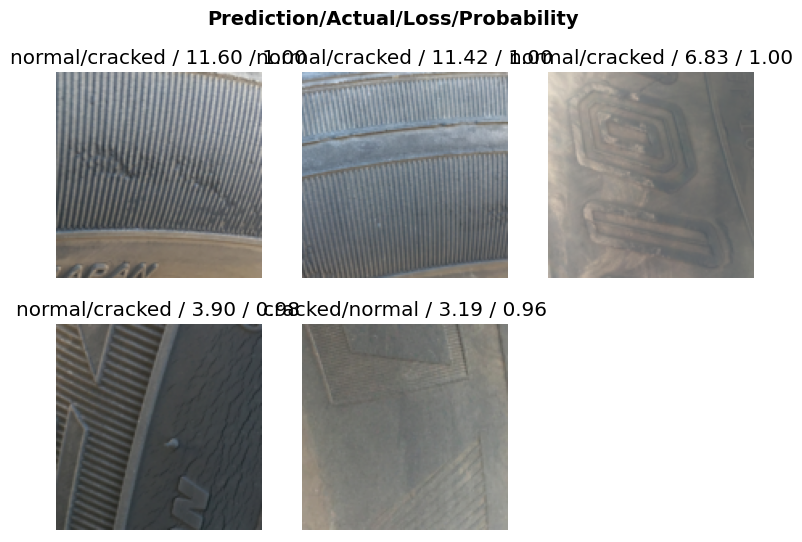

In [9]:
interp.plot_top_losses(5,nrows=2)

In [12]:
fns = get_image_files(path)
fns

(#1027) [Path('Tire Textures/training_data/cracked/Untitled-433.jpg'),Path('Tire Textures/training_data/cracked/Cracked-254.jpg'),Path('Tire Textures/training_data/cracked/Cracked-70.jpg'),Path('Tire Textures/training_data/cracked/NewCracked3.jpg'),Path('Tire Textures/training_data/cracked/Cracked-39 (2).jpg'),Path('Tire Textures/training_data/cracked/Cracked-229.jpg'),Path('Tire Textures/training_data/cracked/Cracked-78.jpg'),Path('Tire Textures/training_data/cracked/NewCracked25.jpg'),Path('Tire Textures/training_data/cracked/Cracked-252.jpg'),Path('Tire Textures/training_data/cracked/Cracked-361.jpg')...]

In [13]:
failed=verify_images(fns)
failed

(#0) []

In [14]:
failed.map(Path.unlink)

(#0) []

In [15]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [17]:
learn.export()

In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn.predict(path/'images.jpeg')

('normal', TensorBase(1), TensorBase([0.0299, 0.9701]))